In [572]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
mM = AHM.Model(Del0A = 0.2, Del0B=0, Del0C= -0.2, na=1, nb=1, nc=1, U=0.2, t=1, inhomp=False, inhomi=True)

H = mM.HBdG()


In [573]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

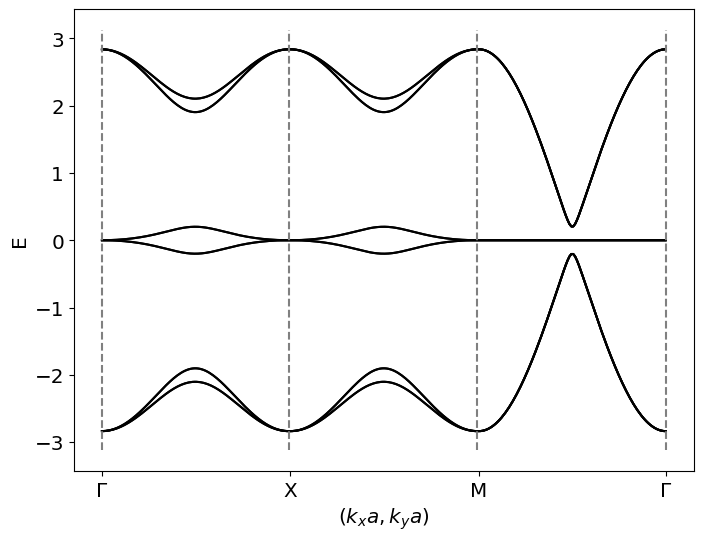

In [574]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpath.png")
plt.show()

In [575]:
degen = []

sum(degen)


0

In [576]:
H(k[0], k[0])

array([[ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j],
       [-2. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
        -0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j, -2. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0.

In [577]:
evals, Evec = np.linalg.eig(H(k[1], k[1]))
Evec = Evec.T
Evec[np.abs(Evec)<1e-15]=0
evals[np.abs(evals)<1e-15]=0

sortedEVals = np.zeros(12)
indexmap = np.zeros(12)
degen = []
c=0
d =0
inbet = np.unique(evals)[::-1]
l=np.shape(inbet)[0]
for t in range(l):
    for i, j in enumerate(evals):
        if j == inbet[t]:
            indexmap[sum(degen)+d]=i
            d+=1
    
    sortedEVals[sum(degen):sum(degen)+d]=inbet[t]
    degen.append(d)              
    
    d=0
    c+=1

sortedEVals

C:\Users\atsch\AppData\Local\Temp\ipykernel_10712\3372292484.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]


array([ 2.83406893,  2.83406893,  2.83406893,  2.83406893,  0.        ,
        0.        ,  0.        ,  0.        , -2.83406893, -2.83406893,
       -2.83406893, -2.83406893])

In [578]:
Carr = np.zeros((12,12), dtype=object)
#Evec = np.linalg.eig(H(k[0], k[0]))[1]
for i in range(12):
    Carr[i]=Evec[int(indexmap[i])]
#Carr=np.round(Carr, 6)
Carr[np.abs(Carr)<1e-15]=0

In [579]:
indexmap

array([ 1.,  2.,  3.,  0.,  8.,  9., 10., 11.,  4.,  7.,  5.,  6.])

In [580]:
Evec

array([[-5.01243482e-01+0.j,  7.03594035e-01+0.j, -4.96275724e-01+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -7.03948443e-02+0.j, -4.96525703e-02+0.j,  0.00000000e+00+0.j],
       [ 5.48384068e-07-0.j,  4.96518006e-02-0.j, -7.03943014e-02+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         4.96275801e-01-0.j,  7.03594089e-01+0.j,  5.01243482e-01-0.j],
       [-1.72094768e-08+0.j, -1.35042011e-03+0.j,  1.91457295e-03+0.j,
        -5.00982392e-01+0.j,  7.02364997e-01+0.j, -4.94794347e-01+0.j,
         7.89793028e-02+0.j,  6.18492934e-02+0.j,  8.70742419e-03+0.j,
        -1.34976462e-02+0.j, -1.91362624e-02+0.j, -1.36327562e-02+0.j],
       [ 9.26038454e-09+0.j,  6.14862723e-04+0.j, -8.71729805e-04+0.j,
         3.08416925e-01+0.j, -4.72059757e-01+0.j,  3.60844965e-01+0.j,
   

In [581]:
Carr[:6]

array([[(5.483840678996256e-07-0j), (0.04965180058391553-0j),
        (-0.07039430135771889+0j), 0, 0, 0, 0, 0, 0,
        (0.49627580085847184-0j), (0.7035940891849914+0j),
        (0.5012434819337384-0j)],
       [(-1.720947676389787e-08+0j), (-0.0013504201119834782+0j),
        (0.001914572948758648+0j), (-0.5009823918094466+0j),
        (0.7023649965446147+0j), (-0.49479434705301817+0j),
        (0.07897930275368864+0j), (0.06184929338162758+0j),
        (0.008707424186714604+0j), (-0.013497646191139107+0j),
        (-0.019136262432371456+0j), (-0.0136327562245125+0j)],
       [(9.260384541810316e-09+0j), (0.000614862722826017+0j),
        (-0.0008717298045401779+0j), (0.30841692541007365+0j),
        (-0.4720597571333729+0j), (0.3608449652294584+0j),
        (0.34784681997231004+0j), (0.5240164452340318+0j),
        (0.39507657386498474+0j), (0.006145662877887138+0j),
        (0.008713001812522828+0j), (0.0062071801214943515+0j)],
       [(-0.5012434819340384+0j), (0.7035940348631

In [582]:
Carr[6:]

array([[(0.6843143994136369+0j), (-0.017103183706946946+0j),
        (-0.6843143994136368+0j), (0.0005780483098000744+0j),
        (-9.852394988913701e-05+0j), (-0.0005780483097998882+0j),
        (0.0009847434725605982+0j), (5.7833947921463756e-05+0j),
        (-0.000984743472560814+0j), (-0.17094572978837805+0j),
        (-0.06846590962505673+0j), (0.17094572978837813+0j)],
       [(0.051664438268981795+0j), (0.0045310512962521985+0j),
        (-0.05166443826898179+0j), (-0.6895240553604264+0j),
        (-0.013177181092042413+0j), (0.6895240553604265+0j),
        (0.131705469398535+0j), (-0.06898713763594763+0j),
        (-0.13170546939853503+0j), (0.04528770103964914+0j),
        (-0.005169046222590619+0j), (-0.045287701039649304+0j)],
       [0, 0, 0, (0.5011677890871924-0j), (0.7026249189699778+0j),
        (0.494977454336802-0j), (0.07900853042310015-0j),
        (-0.06187218179210031+0j), (0.008710646521005698-0j), 0, 0, 0],
       [(0.5012434819340384-0j), (0.7035940348631531+0

In [583]:
degen

[1, 1, 1, 1, 4, 2, 1, 1]

In [584]:
Uarr = np.zeros((12,12))
c=0
c2=0
for t in range(6):
    for j in range(6,12):
    
        for s in range(6):
            if (Carr[t, s]==Carr[j, s+6] and Carr[t, s+6]==Carr[j, s]) or (Carr[t, s]==Carr[j, s+6]*(-1) and Carr[t, s+6]==Carr[j, s]*(-1)):
                c+=1
                
                
            if Carr[t, s]==Carr[j, s+6]*(-1) and Carr[t, s+6]==Carr[j, s]*(-1):
                c2+=1
                
        if c2==6:
            Carr[j]=Carr[j]*(-1)
        if c==6:
            Uarr[t]=Carr[t]
            Uarr[t+6]=Carr[j]
            print(t)              
        c=0
        c2=0


In [585]:
Uarr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [586]:
Carr[0, :6]

array([(5.483840678996256e-07-0j), (0.04965180058391553-0j),
       (-0.07039430135771889+0j), 0, 0, 0], dtype=object)

In [587]:
Carr[11,6:]==Carr[0, :6]

array([False, False, False, False, False, False])

In [588]:
D = np.diag(sortedEVals)

In [589]:
np.matmul(H(k[0], k[0]),Evec[0])

array([-1.42126704e+00+0.j,  1.99503841e+00+0.j, -1.40718807e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
       -1.99553837e-01+0.j, -1.40789689e-01+0.j, -4.99959295e-05+0.j])

In [590]:
np.shape(np.linalg.eig(H(k[0], k[0]))[1])

(12, 12)

In [591]:
indexmap

array([ 1.,  2.,  3.,  0.,  8.,  9., 10., 11.,  4.,  7.,  5.,  6.])

In [592]:
Uarr[0, 0]

0.0

In [593]:
Uarr[6, 6]

0.0

In [594]:
sortedEVals

array([ 2.83406893,  2.83406893,  2.83406893,  2.83406893,  0.        ,
        0.        ,  0.        ,  0.        , -2.83406893, -2.83406893,
       -2.83406893, -2.83406893])

In [595]:
Uarr[0:6, 0:6]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [596]:
Uarr[6:, 6:]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [597]:
Uarr[6:, 0:6]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [598]:
Uarr[0:6, 6:]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [599]:
H(k[0], k[0])

array([[ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j],
       [-2. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
        -0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j, -2. +0.j,
         0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -2. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j,  0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  2. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0.

In [600]:
np.diag(np.matmul(Uarr,np.matmul(H(k[0], k[0]), Uarr.T)))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [601]:
u=Uarr[0:6, 0:6]
v=Uarr[0:6,6:]

In [602]:
np.matmul(u, v)[1, 4]

0.0

In [603]:
np.matmul(u.T, v)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [604]:
np.matmul(v.T, u)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [605]:
Uarr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [606]:
np.diag(np.matmul(Uarr,np.matmul(H(k[0], k[0]), Uarr.T)))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [607]:
np.linspace(0,10,num=10, endpoint=False)
k=np.linspace(0,2*np.pi, 10, endpoint=False)
k

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678])

In [608]:
dan, dbn, dcn = (1, 0, 0)

da, db, dc = (dan, dbn, dcn)

mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=0.1, t=0, inhomp=False, inhomi=True)
mM.DeltaN(k)

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:140: ComplexWarning: Casting complex values to real discards the imaginary part
  for j in range(6,12):


AttributeError: 'numpy.ndarray' object has no attribute 'H'

In [ ]:
dan, dbn, dcn = (1, 0, 0)
dels = np.array([[],[],[]])
r = []
r2 = []
for i in range(20):
    print(i, (dan, dbn, dcn))
    da, db, dc = (dan, dbn, dcn)
    delarro = np.array([da, db, dc])
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=0.1, t=0, inhomp=False, inhomi=True)
    Delta = mM.DeltaN(k)
    dan=Delta[0]
    dbn=Delta[1]
    dcn=Delta[2]
    delarrn = np.array([dan, dbn, dcn])
    
    err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]
    err2 = np.sqrt(np.sum((delarrn-delarro)**2))/(np.sqrt(np.sum(delarro**2)+1e-9))
    r.append(err)
    r2.append(err2)
    dels = np.concatenate((dels, delarro.reshape(3,1)), axis=1)

r=np.array(r)
r2 = np.array(r2)
r_U06 = r2

C:\Users\atsch\AppData\Local\Temp\ipykernel_10712\1075845851.py:16: RuntimeWarning: invalid value encountered in scalar divide
  err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]


0 (1, 0, 0)
1 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
2 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
3 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
4 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
5 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
6 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
7 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
8 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
9 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
10 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
11 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
12 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
13 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
14 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
15 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
16 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
17 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
18 ((0.5555555555555555-0j), (-0+0j), (-0+0j))
19 ((0.5555555555555555-0j), (-0+0j), (-0+0j))


In [ ]:
dan, dbn, dcn = (1, 0, 0)
dels2 = np.array([[],[],[]])
r = []
r2 = []
for i in range(20):
    print(i, (dan, dbn, dcn))
    da, db, dc = (dan, dbn, dcn)
    delarro = np.array([da, db, dc])
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=0.2, t=0, inhomp=False, inhomi=True)
    Delta = mM.DeltaN(k)
    dan=Delta[0]
    dbn=Delta[1]
    dcn=Delta[2]
    delarrn = np.array([dan, dbn, dcn])
    
    err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]
    err2 = np.sqrt(np.sum((delarrn-delarro)**2))/(np.sqrt(np.sum(delarro**2)+1e-9))
    r.append(err)
    r2.append(err2)
    dels2 = np.concatenate((dels2, delarro.reshape(3,1)), axis=1)

r=np.array(r)
r2 = np.array(r2)
r_U06 = r2

0 (1, 0, 0)
1 ((1.111111111111111-0j), (-0+0j), (-0+0j))
2 ((1.111111111111111-0j), (-0+0j), (-0+0j))
3 ((1.111111111111111-0j), (-0+0j), (-0+0j))
4 ((1.111111111111111-0j), (-0+0j), (-0+0j))


C:\Users\atsch\AppData\Local\Temp\ipykernel_10712\2219974546.py:16: RuntimeWarning: invalid value encountered in scalar divide
  err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]


5 ((1.111111111111111-0j), (-0+0j), (-0+0j))
6 ((1.111111111111111-0j), (-0+0j), (-0+0j))
7 ((1.111111111111111-0j), (-0+0j), (-0+0j))
8 ((1.111111111111111-0j), (-0+0j), (-0+0j))
9 ((1.111111111111111-0j), (-0+0j), (-0+0j))
10 ((1.111111111111111-0j), (-0+0j), (-0+0j))
11 ((1.111111111111111-0j), (-0+0j), (-0+0j))
12 ((1.111111111111111-0j), (-0+0j), (-0+0j))
13 ((1.111111111111111-0j), (-0+0j), (-0+0j))
14 ((1.111111111111111-0j), (-0+0j), (-0+0j))
15 ((1.111111111111111-0j), (-0+0j), (-0+0j))
16 ((1.111111111111111-0j), (-0+0j), (-0+0j))
17 ((1.111111111111111-0j), (-0+0j), (-0+0j))
18 ((1.111111111111111-0j), (-0+0j), (-0+0j))
19 ((1.111111111111111-0j), (-0+0j), (-0+0j))


In [ ]:
mM = AHM.Model(Del0A = 1j, Del0B=0, Del0C= 0, U=0.5, t=0, inhomp=False, inhomi=True)

dels = mM.Deltra(k, N=20)[0]

mM2 = AHM.Model(Del0A = 1, Del0B=0, Del0C= 0, U=0.5, t=0, inhomp=False, inhomi=True)
dels2 = mM2.Deltra(k, N=20)[0]

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:140: ComplexWarning: Casting complex values to real discards the imaginary part
  for j in range(6,12):


In [ ]:
dels2

array([[ 1.        +0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j,  2.77777778-0.j,
         2.77777778-0.j,  2.77777778-0.j],
       [ 0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j],
       [ 0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0. 

In [ ]:
dan, dbn, dcn = (1, 0, 0)
dels3 = np.array([[],[],[]])
r = []
r2 = []
for i in range(20):
    print(i, (dan, dbn, dcn))
    da, db, dc = (dan, dbn, dcn)
    delarro = np.array([da, db, dc])
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=0.3, t=0, inhomp=False, inhomi=True)
    Delta = mM.DeltaN(k)
    dan=Delta[0]
    dbn=Delta[1]
    dcn=Delta[2]
    delarrn = np.array([dan, dbn, dcn])
    
    err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]
    err2 = np.sqrt(np.sum((delarrn-delarro)**2))/(np.sqrt(np.sum(delarro**2)+1e-9))
    r.append(err)
    r2.append(err2)
    dels3 = np.concatenate((dels3, delarro.reshape(3,1)), axis=1)

r=np.array(r)
r2 = np.array(r2)
r_U06 = r2

0 (1, 0, 0)
1 ((1.6666666666666663-0j), (-0+0j), (-0+0j))
2 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
3 ((0.5915958646564-0j), (-0+0j), (-0+0j))
4 ((1.6666666666666663-0j), (-0+0j), (-0+0j))


C:\Users\atsch\AppData\Local\Temp\ipykernel_10712\180189949.py:16: RuntimeWarning: invalid value encountered in scalar divide
  err = [np.abs(dan-da)/np.abs(dan), np.abs(dbn-db)/np.abs(dbn), np.abs(dcn-dc)/np.abs(dcn)]


5 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
6 ((0.5915958646564-0j), (-0+0j), (-0+0j))
7 ((1.6666666666666663-0j), (-0+0j), (-0+0j))
8 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
9 ((0.5915958646564-0j), (-0+0j), (-0+0j))
10 ((1.6666666666666663-0j), (-0+0j), (-0+0j))
11 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
12 ((0.5915958646564-0j), (-0+0j), (-0+0j))
13 ((1.6666666666666663-0j), (-0+0j), (-0+0j))
14 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
15 ((0.5915958646564-0j), (-0+0j), (-0+0j))
16 ((1.6666666666666663-0j), (-0+0j), (-0+0j))
17 ((0.9070142434829356-0j), (-0+0j), (-0+0j))
18 ((0.5915958646564-0j), (-0+0j), (-0+0j))
19 ((1.6666666666666663-0j), (-0+0j), (-0+0j))


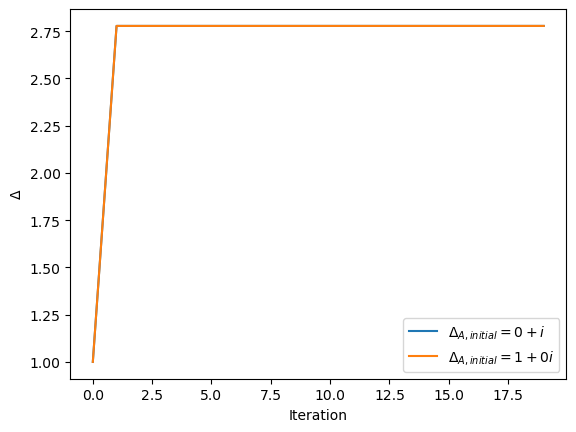

In [ ]:
plt.xlabel('Iteration')
plt.ylabel(r'$\Delta$')

plt.plot(np.arange(20), np.abs(dels[0]), label = r'$\Delta_{A,initial}=0+i$')
plt.plot(np.arange(20), np.abs(dels2[0]), label = r'$\Delta_{A,initial}=1+0i$')
#plt.plot(np.arange(20), dels3[0], label = r'$\Delta_C$')

plt.legend()
plt.show()

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


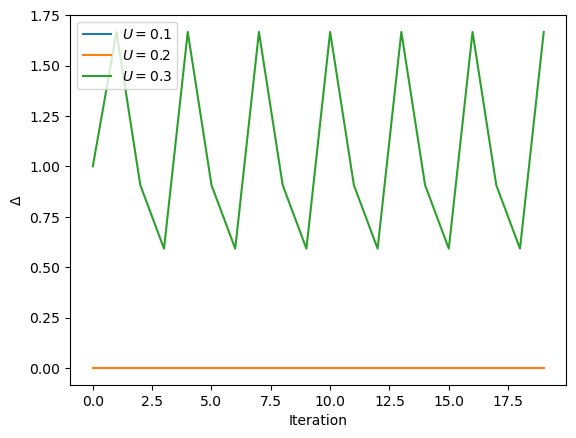

In [ ]:
plt.xlabel('Iteration')
plt.ylabel(r'$\Delta$')

plt.plot(np.arange(20), dels[0], label = r'$U=0.1$')
plt.plot(np.arange(20), dels2[0], label = r'$U=0.2$')
plt.plot(np.arange(20), dels3[0], label = r'$U=0.3$')

plt.legend()
plt.show()

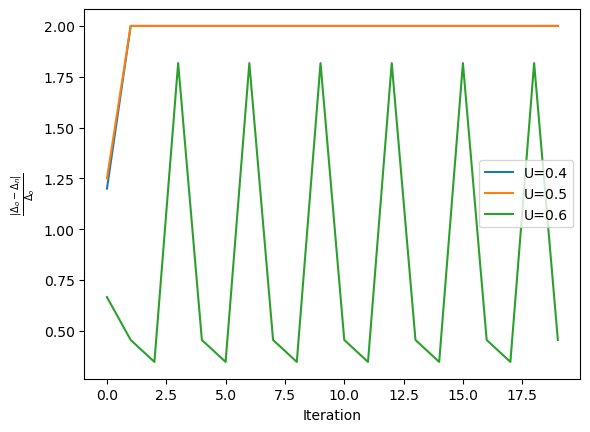

In [ ]:
plt.xlabel('Iteration')
plt.ylabel(r'$\frac{|\Delta_o-\Delta_n|}{\Delta_o}$')

plt.plot(np.arange(20), r_U04, label = 'U=0.4')
plt.plot(np.arange(20), r_U05, label = 'U=0.5')
plt.plot(np.arange(20), r_U06, label = 'U=0.6')

plt.legend()
plt.show()